Trần Chí Hùng 18093941

---
Nguyễn Mạnh Hà 18084821

---
Lê Ngọc Tồn 18086441



# Case 1: 



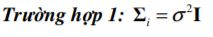

 Ta cần xây dựng hệ phân lớp với 2 lớp
 ω1 ω2, , đặc trưng x với likelihood sau


p(x|ω1)=N(4,1)

---
p(x|ω2)=N(6,1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
#Tạo dữ liệu 2 lớp
mu_1, sigma_1 = 4, 1
#Tạo dữ liệu w1
x1 = np.random.normal(mu_1, sigma_1, 1000)

mu_2, sigma_2 = 6, 1
#Tạo dữ liệu w2
x2 = np.random.normal(mu_2, sigma_2, 1000)

In [ ]:
def tinh_Wt(mu,sigma):
  x=mu/pow(sigma,2)
  return x

In [ ]:
def tinh_w0(mu,sigma,Pw):
  x=-pow(mu,2)/2*pow(sigma,2)+np.log(Pw)
  return float(x)

In [ ]:
def case1(mu_1,sigma_1,Pw1,mu_2,sigma_2,Pw2):
  x0=0.5*(mu_1+mu_2)-(pow(sigma_1,2)/np.linalg.norm(mu_1-mu_2))*np.log(Pw1/Pw2)*(mu_1-mu_2)
  return x0

In [ ]:
Pw1=len(x1)/(len(x1)+len(x2))
Pw2=len(x2)/(len(x1)+len(x2))
Wt=tinh_Wt(mu_1,sigma_1)-tinh_Wt(mu_2,sigma_2)
w0=tinh_w0(mu_1,sigma_1,Pw1)-tinh_w0(mu_2,sigma_2,Pw2)
x0=case1(mu_1,sigma_1,Pw1,mu_2,sigma_2,Pw2)
X=np.random.normal(x0, sigma_2, 2)
gx=Wt*X+w0

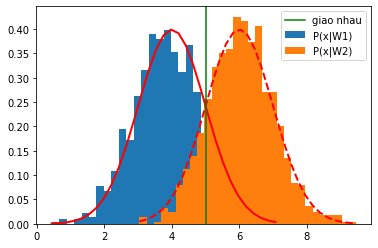

In [ ]:
count_1, bins_1, ignored_1 = plt.hist(x1, 30, density=True,label='P(x|W1)')
px1 = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-(bins_1 - mu_1)**2 / (2*sigma_1**2))
plt.plot(bins_1, px1, linewidth=2, color='r')
count_2, bins_2, ignored_2 = plt.hist(x2, 30, density=True,label='P(x|W2)')
px2 = (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-(bins_2 - mu_2)**2 / (2*sigma_2**2))
plt.plot(bins_2, px2,'r--' ,linewidth=2)
#plt.plot( X,gx,'g--', linewidth=2)
plt.axvline(x=x0, label="giao nhau",c="g")
plt.legend(loc='upper right')

plt.show()

# Case 2: trường hợp: Σi=Σ


 Ta cần xây dựng hệ phân lớp với 2 lớp ω1 ω2, , đặc trưng x với likelihood sau

p(x|ω1)=N([15,22], [[2,0.5],[0.5,2]])

---
p(x|ω2)=N([8,18], [[2,0.5],[0.5,2]])

In [ ]:
mu_1=[15,22]
sigma_1=[[2,0.5],[0.5,2]]
x1=np.random.multivariate_normal(mu_1,sigma_1,1000).T
mu_1=np.matrix(mu_1).T
sigma_1=np.matrix(sigma_1)
mu_2=[8,18]
sigma_2=[[2,0.5],[0.5,2]]
x2=np.random.multivariate_normal(mu_2,sigma_2,1000).T
mu_2=np.matrix(mu_2).T
sigma_2=np.matrix(sigma_2)
mu=mu_1-mu_2

In [ ]:
Pw1=x1.shape[0]/(x1.shape[0]+x2.shape[0])
Pw2=x2.shape[0]/(x1.shape[0]+x2.shape[0])

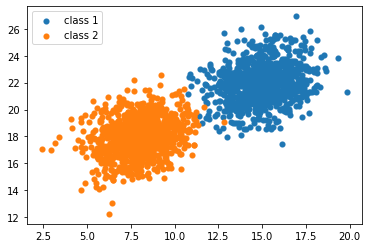

In [ ]:
#1. plot dữ liệu
plt.scatter(x1[0],x1[1],linewidths=0.1,label="class 1")
plt.scatter(x2[0],x2[1],linewidths=0.1,label="class 2")
plt.legend(loc="best")
plt.show()

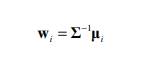

In [ ]:
def tinh_Wi2(mu,sigma):
  wi=np.linalg.inv(sigma)*mu
  return wi

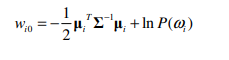

In [ ]:
def tinh_wi02(mu,sigma,Pw):
  x=-0.5*mu.transpose()*np.linalg.inv(sigma)*mu+np.log(Pw)
  return float(x)

In [ ]:
def fx(x):
  return float(-(x-x0[0])*mu[0]/mu[1] + x0[1])

In [ ]:
def case2(mu_1,sigma_1,Pw1,mu_2,sigma_2,Pw2):
  x0=0.5*(mu_1+mu_2)-float((1/(((mu_1-mu_2).transpose())*np.linalg.inv(sigma_1)*(mu_1-mu_2)))*np.log(Pw1/Pw2))*(mu_1-mu_2)
  return x0

In [ ]:
Pw1=x1.shape[0]/(x1.shape[0]+x2.shape[0])
Pw2=x2.shape[0]/(x1.shape[0]+x2.shape[0])
Wt=tinh_Wi2(mu_1,sigma_1)-tinh_Wi2(mu_2,sigma_2)
w0=tinh_wi02(mu_1,sigma_1,Pw1)-tinh_wi02(mu_2,sigma_2,Pw2)
x0=case2(mu_1,sigma_1,Pw1,mu_2,sigma_2,Pw2)
print(x0)

[[11.5]
 [20. ]]


In [ ]:
x_1 = np.min(np.concatenate([x1[0],x2[0]]))
x_2 = np.max(np.concatenate([x1[0],x2[0]]))

No handles with labels found to put in legend.


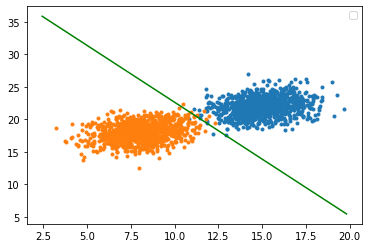

In [ ]:
plt.plot(x1[0],x1[1],'.')
plt.plot(x2[0],x2[1],'.')
plt.plot([x_1,x_2], [fx(x_1),fx(x_2)],'g-')
plt.legend(loc='upper right')

plt.show()